In [2]:
from NetClasses import *
from SobolevClasses import *
import pandas as pd

2024-06-13 15:38:35.298178: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Create a Classical Sobolev Space of r = 2, p = 2

domain = [(0, 2*sp.pi), (0, 2*sp.pi)]
ClassicSobolevSpace = SobolevSpace(domain, r=2, p=2)

x, y = sp.symbols('x y')
variables = [x, y]
f = sp.sin(x) * sp.cos(y)

# Find the Sobolev Norm of f
ClassicalNorm = ClassicSobolevSpace.norm(f, variables)
print(f"The Sobolev Norm of {f} of order {ClassicSobolevSpace.r} and degree {ClassicSobolevSpace.p} is {float(ClassicalNorm)}")

The Sobolev Norm of sin(x)*cos(y) of order 2 and degree 2 is 7.695298980971184


In [4]:
# Create a Discritized Sobolev Space of r = 2, p = 2

domain = [(0, 2*np.pi), (0, 2*np.pi)]
grid_resolution = [10, 10]
DSobolevSpace = DiscreteSobolevSpace(domain, grid_res = grid_resolution, r=2, p=2)

# Find the Sobolev Norm of f
def f(x, y):
    return np.sin(x) * np.cos(y)

DiscreteNorm = DSobolevSpace.norm(f)
print(f"The Sobolev Norm of order {DSobolevSpace.r} and degree {DSobolevSpace.p} with grid resolution {grid_resolution} is {DiscreteNorm}")

The Sobolev Norm of order 2 and degree 2 with grid resolution [10, 10] is 7.76522377648773


### To do: lots of dims

In [5]:
# Create family of functions f_n(x) = sin(x_1) * ... * sin(x_n)
def f_1(x):
    return np.sin(x)

def f_2(x,y):
    return np.sin(x) * np.sin(y)

def f_3(x, y, z):
    return np.sin(x) * np.sin(y) * np.sin(z)

In [ ]:
grid_resolutions = np.arange(10, 1001, 50)

# Create dataframe of norm vals to save to csv
norms = []
for i,f in enumerate([f_1,f_2,f_3]):
    domain = [(0, 2*np.pi)] * (i+1)
    norm_dim = []
    for res in tqdm(grid_resolutions, desc=f"Dim {i+1}"):
        space = DiscreteSobolevSpace(domain, r=2, p=2, grid_res=[res]*(i+1))
        norm_dim.append(space.norm(f))
        # Write norm_dim to csv
        np.savetxt(f"norms_{i+1}.csv", norm_dim, delimiter=",")

    norms.append(norm_dim)

In [6]:
# Calculate classical norms
x,y,z = sp.symbols('x y z')
variables = [x,y,z]

g_1 = sp.sin(x)
g_2 = sp.sin(x) * sp.sin(y)
g_3 = sp.sin(x) * sp.sin(y) * sp.sin(z)

ClassicalNorms = []
for i, g in enumerate([g_1,g_2,g_3]):
    domain = [(0, 2*sp.pi)] * (i+1)
    ClassicSobolevSpace = SobolevSpace(domain, r=2, p=2)
    norm = ClassicSobolevSpace.norm(g, variables[:i+1])
    ClassicalNorms.append(norm)

ClassicalNorms = [float(norm) for norm in ClassicalNorms]

In [11]:
grid_resolutions = np.arange(10, 1001, 50)

norms = []
norms.append(np.loadtxt("norms_1.csv", delimiter=","))
norms.append(np.loadtxt("norms_2.csv", delimiter=","))
norms.append(np.loadtxt("norms_3.csv", delimiter=","))

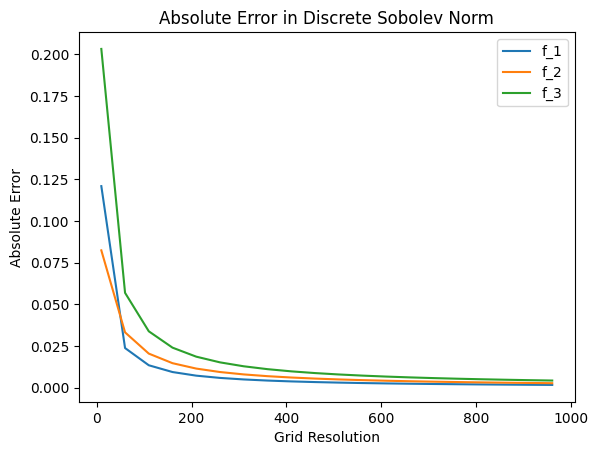

In [24]:
# Find and plot errors
errors_f1 = np.abs(np.array(norms[0]) - ClassicalNorms[0])
errors_f2 = np.abs(np.array(norms[1]) - ClassicalNorms[1])
errors_f3 = np.abs(np.array(norms[2]) - ClassicalNorms[2])

plt.plot(grid_resolutions, errors_f1, label="f_1")
plt.plot(grid_resolutions, errors_f2, label="f_2")
plt.plot(grid_resolutions, errors_f3, label="f_3")
plt.legend()
plt.xlabel("Grid Resolution")
plt.ylabel("Absolute Error")
plt.title("Absolute Error in Discrete Sobolev Norm")
plt.show()

In [86]:
# Turn the norms into absolute errors
errors_f1 = np.abs(np.array(norms_f1) - ClassicalNorms[0])
errors_f2 = np.abs(np.array(norms_f2) - ClassicalNorms[1])
# errors_f3 = np.abs(np.array(norms_f3) - ClassicalNorm[2])


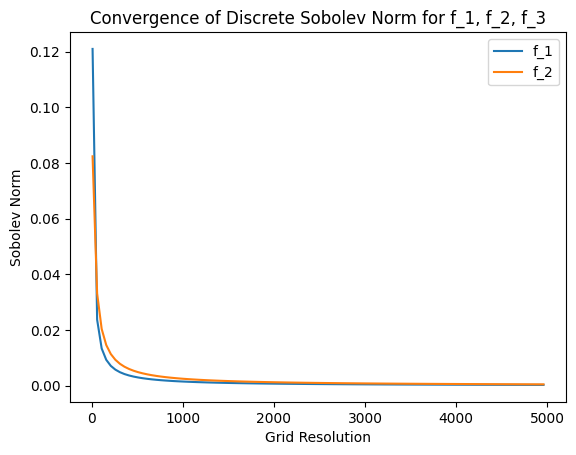

In [87]:
# Plot norms_f1, norms_f2, norms_f3
plt.plot(grid_resolutions, errors_f1, label="f_1")
plt.plot(grid_resolutions, errors_f2, label="f_2")
# plt.plot(grid_resolutions, norms_f3, label="f_3")
plt.legend()
plt.xlabel("Grid Resolution")
plt.ylabel("Sobolev Norm")
plt.title("Convergence of Discrete Sobolev Norm for f_1, f_2, f_3")
plt.show()

In [14]:
# Convergence of Discrete Sobolev Norm for f_n
grid_resolutions = np.arange(10, 2500, 500)

dims = []
plt.figure()
for n in range(1,5):
    print("#####################################")
    domain = [(0, 2*np.pi)] * n
    norms = []
    for res in grid_resolutions:
        space = DiscreteSobolevSpace(domain, r=2, p=2, grid_res=[res]*n)
        norms.append(space.norm(funcs[n-1]))
        print(f"Norm for {n} dims and grid resolution {res} is {norms[-1]}")
    dims.append(norms)
    plt.plot(norms)

plt.xlabel("Grid Resolution")
plt.ylabel("Sobolev Norm")
plt.suptitle("Convergence of Discrete Sobolev Norm")
plt.show()

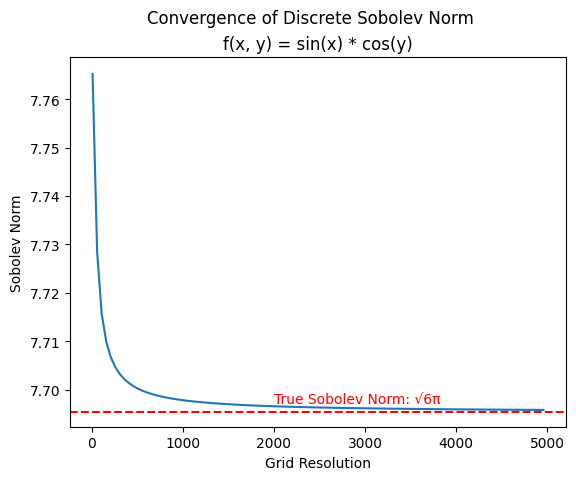

In [15]:
plt.plot(grid_resolutions, norms)
plt.xlabel("Grid Resolution")
plt.ylabel("Sobolev Norm")
plt.suptitle("Convergence of Discrete Sobolev Norm")
# Add subtitle
plt.title("f(x, y) = sin(x) * cos(y), r = 2, p = 2")
# Plot line for true Sobolev norm value
plt.axhline(ClassicalNorm, linestyle='--', color='red')
# Add text for true Sobolev norm value
plt.text(2000, ClassicalNorm + 0.002, f"True Sobolev Norm: √6π", color='red')
plt.show()

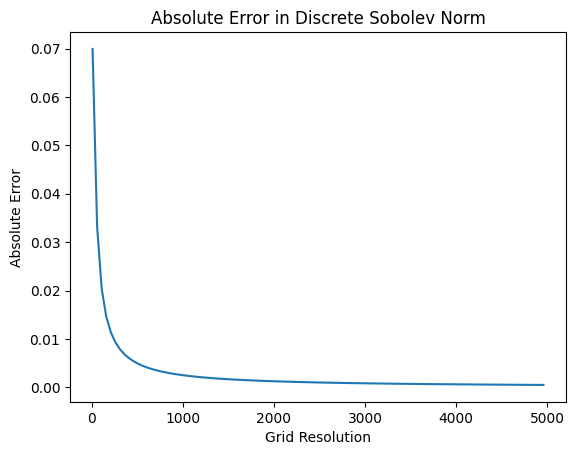

Grid resolution 10 give less than 1% error.
Grid resolution 360 give less than 0.1% error.
Grid resolution 3360 give less than 0.01% error.


In [17]:
# Plot the absolute error in the Sobolev norm
errors = np.abs(np.array(norms) - ClassicalNorm)
plt.plot(grid_resolutions, errors)
plt.xlabel("Grid Resolution")
plt.ylabel("Absolute Error")
plt.title("Absolute Error in Discrete Sobolev Norm")
plt.show()

# Give first indices that give less than 1%, 0.1%, 0.01% error
indices = np.where(errors < ClassicalNorm*0.01)[0][0]
print(f"Grid resolution {grid_resolutions[indices]} give less than 1% error.")
indices = np.where(errors < ClassicalNorm*0.001)[0][0]
print(f"Grid resolution {grid_resolutions[indices]} give less than 0.1% error.")
indices = np.where(errors < ClassicalNorm*0.0001)[0][0]
print(f"Grid resolution {grid_resolutions[indices]} give less than 0.01% error.")

          Loss
N             
1     0.424765
101   0.121403
201   0.080495
301   0.052666
401   0.034786
501   0.021400
601   0.012293
701   0.008469
801   0.008678
901   0.010341
1001  0.010841
1101  0.011640
1201  0.011749
1301  0.011519
1401  0.011098
1501  0.010382
1601  0.009539
1701  0.009608
1801  0.009166
1901  0.008773
2001  0.008158
2101  0.008447
2201  0.007754
2301  0.007242
2401  0.007398


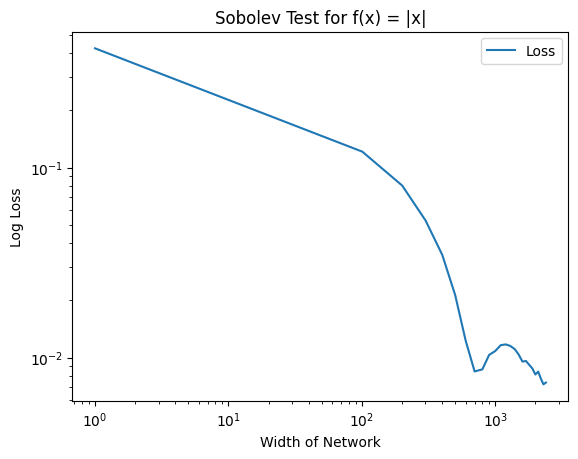

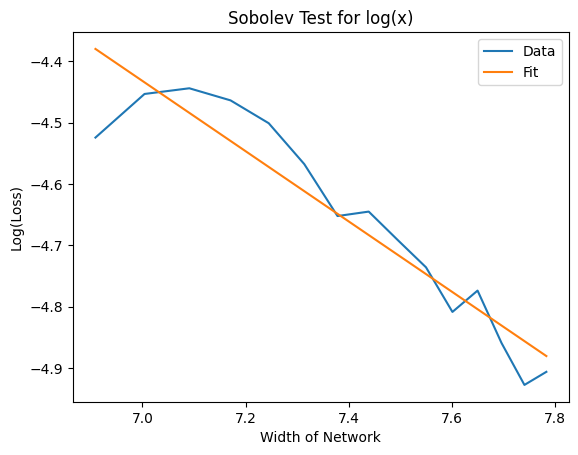

m: -0.5725453672351978, b: -0.42426901535855255


In [20]:
# Read in the results from multiple csv
results = pd.read_csv("data/abs.csv")
# Remove 1st column
results = results.iloc[:,1:]
results = results.groupby('N').mean()
print(results)
results.plot()
plt.title("Sobolev Test for f(x) = |x|")
plt.xlabel("Width of Network")
plt.ylabel("Log Loss")
plt.yscale('log')
plt.xscale('log')
plt.show()

# Fit a line to the log-data
log_results = np.log(results)
log_results = log_results[log_results.index > 1000]

# Fit a line to the log-data
m, b = np.polyfit(np.log(log_results.index), log_results['Loss'], 1)
plt.plot(np.log(log_results.index), log_results['Loss'], label='Data')
plt.plot(np.log(log_results.index), m*np.log(log_results.index) + b, label='Fit')
plt.title("Sobolev Test for f(x)")
plt.xlabel("Width of Network")
plt.ylabel("Log(Loss)")
plt.legend()
plt.show()
print(f"m: {m}, b: {b}")

          Loss
N             
1     0.473412
101   0.123535
201   0.084079
301   0.066714
401   0.059122
501   0.055204
601   0.053783
701   0.052719
801   0.052709
901   0.051668
1001  0.051295
1101  0.050583
1201  0.050093
1301  0.048719
1401  0.048657
1501  0.047432
1601  0.047450
1701  0.046505
1801  0.044814
1901  0.045212
2001  0.043544
2101  0.044537
2201  0.042800
2301  0.043194
2401  0.042676


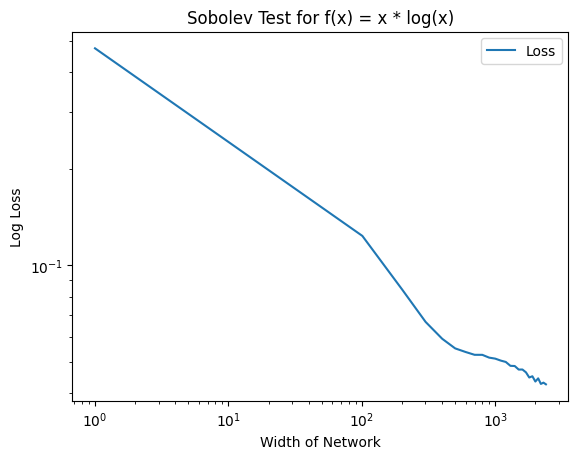

In [6]:
# Read in the results from multiple csv
results = pd.read_csv("data/xlogx.csv")
# Remove 1st column
results = results.iloc[:,1:]
results = results.groupby('N').mean()
print(results)
results.plot()
plt.title("Sobolev Test for f(x) = x * log(x)")
plt.xlabel("Width of Network")
plt.ylabel("Log Loss")
plt.yscale('log')
plt.xscale('log')
plt.show()

          Loss
N             
1     0.663418
101   0.303177
201   0.261716
301   0.226369
401   0.199567
501   0.175704
601   0.158590
701   0.145909
801   0.132793
901   0.126715
1001  0.113805
1101  0.104804
1201  0.100026
1301  0.092418
1401  0.088214
1501  0.088240
1601  0.079015
1701  0.080734
1801  0.075303
1901  0.070983
2001  0.067287
2101  0.063526
2201  0.062690
2301  0.061139
2401  0.056014


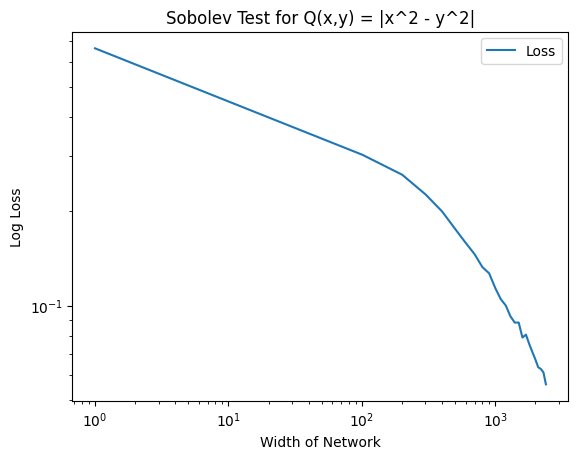

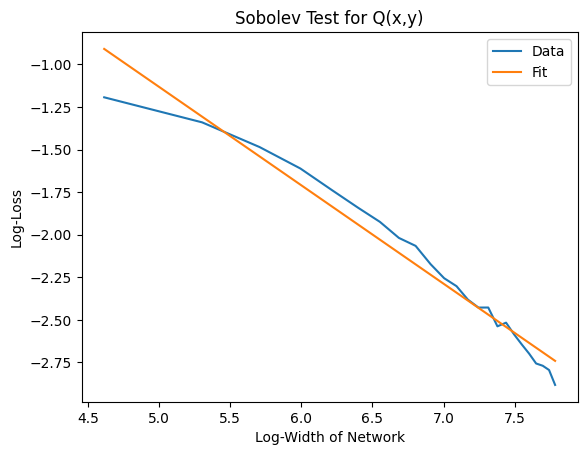

m: -0.5780852339811859, b: 1.758635899092077


In [28]:
# Read in the results from multiple csv
results = pd.read_csv("data/SobolevTest_e^(-x^2).csv")
# Remove 1st column
results = results.iloc[:,1:]
results = results.groupby('N').mean()
print(results)
results.plot()
plt.title("Sobolev Test for Q(x,y) = |x^2 - y^2|")
plt.xlabel("Width of Network")
plt.ylabel("Log Loss")
plt.yscale('log')
plt.xscale('log')
plt.show()

# Fit a line to the log-data
log_results = np.log(results)
log_results = log_results[log_results.index > 100]

# Fit a line to the log-data
m, b = np.polyfit(np.log(log_results.index), log_results['Loss'], 1)
plt.plot(np.log(log_results.index), log_results['Loss'], label='Data')
plt.plot(np.log(log_results.index), m*np.log(log_results.index) + b, label='Fit')
plt.title("Sobolev Test for Q(x,y)")
plt.xlabel("Log-Width of Network")
plt.ylabel("Log-Loss")
plt.legend()
plt.show()
print(f"m: {m}, b: {b}")

          Loss
N             
1     0.841036
101   0.386180
201   0.225703
301   0.148949
401   0.141214
501   0.119419
601   0.105430
701   0.097233
801   0.090170
901   0.076520
1001  0.069990
1101  0.061794
1201  0.057855
1301  0.059001
1401  0.049910
1501  0.048135
1601  0.042953
1701  0.043061
1801  0.043569
1901  0.042364
2001  0.041604
2101  0.037685
2201  0.037835
2301  0.038200
2401  0.036788


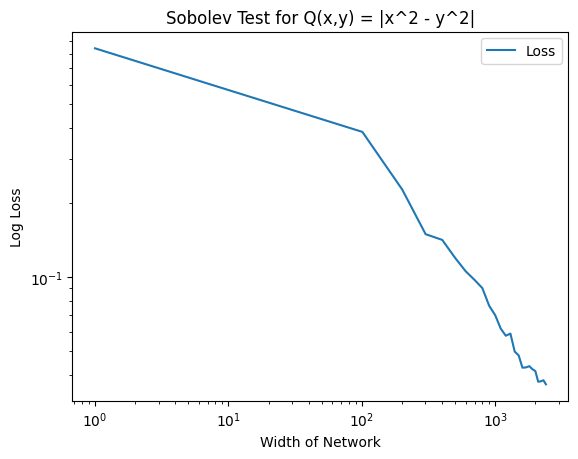

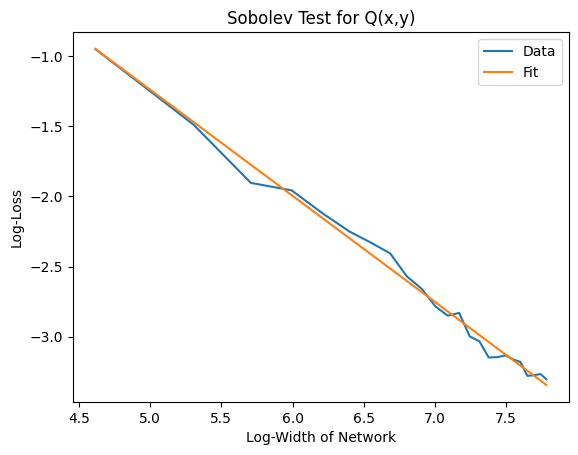

m: -0.7552735471894476, b: 2.535671589728614


In [3]:
# Read in the results from multiple csv
results = pd.read_csv("data/sqrt.csv")
# Remove 1st column
results = results.iloc[:,1:]
results = results.groupby('N').mean()
print(results)
results.plot()
plt.title("Sobolev Test for Q(x,y) = |x^2 - y^2|")
plt.xlabel("Width of Network")
plt.ylabel("Log Loss")
plt.yscale('log')
plt.xscale('log')
plt.show()

# Fit a line to the log-data
log_results = np.log(results)
log_results = log_results[log_results.index > 100]

# Fit a line to the log-data
m, b = np.polyfit(np.log(log_results.index), log_results['Loss'], 1)
plt.plot(np.log(log_results.index), log_results['Loss'], label='Data')
plt.plot(np.log(log_results.index), m*np.log(log_results.index) + b, label='Fit')
plt.title("Sobolev Test for Q(x,y)")
plt.xlabel("Log-Width of Network")
plt.ylabel("Log-Loss")
plt.legend()
plt.show()
print(f"m: {m}, b: {b}")